In [226]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sps
import scipy.io as sio
%matplotlib inline
matplotlib.style.use('ggplot')

In [227]:
p01 = sio.loadmat('P01.mat')['data']
s01 = sio.loadmat('S01.mat')['data']

In [228]:
s01 = sio.loadmat('S01.mat')['data']
s02 = sio.loadmat('S02.mat')['data']
s03 = sio.loadmat('S03.mat')['data']
s04 = sio.loadmat('S04.mat')['data']
s05 = sio.loadmat('S05.mat')['data']
s06 = sio.loadmat('S06.mat')['data']
s07 = sio.loadmat('S07.mat')['data']
s08 = sio.loadmat('S08.mat')['data']
s09 = sio.loadmat('S09.mat')['data']
s10 = sio.loadmat('S10.mat')['data']

In [229]:
p01 = sio.loadmat('P01.mat')['data']
p02 = sio.loadmat('P02.mat')['data']
p03 = sio.loadmat('P03.mat')['data']
p04 = sio.loadmat('P04.mat')['data']
p05 = sio.loadmat('P05.mat')['data']
p06 = sio.loadmat('P06.mat')['data']
p07 = sio.loadmat('P07.mat')['data']
p08 = sio.loadmat('P08.mat')['data']
p09 = sio.loadmat('P09.mat')['data']
p10 = sio.loadmat('P10.mat')['data']

IOError: [Errno 2] No such file or directory: 'P04.mat'

In [105]:
electrodos, tiempos =  256, 201

In [106]:
def convertToDataFrame(data):
    epochs, electrodos, tiempos =  data.shape
    data = data.reshape((electrodos*epochs, tiempos))

    l1 = []
    l2 = []
    datos = []
    for x in range(0, electrodos) : 
        for y in range(0, epochs) : 
            l1.append(x)
            l2.append(y)

    l =  [l1,l2]
    tuples = list(zip(*l))

    index = pd.MultiIndex.from_tuples(tuples, names=['electrodos', 'epochs'])

    return pd.DataFrame(data, index=index)

def dataEpochs(df):
    return df.shape[0] / electrodos

In [41]:
dfs = [
    convertToDataFrame(p01),
    convertToDataFrame(p02),
    convertToDataFrame(p03),
    convertToDataFrame(p04),
    convertToDataFrame(p05),
    convertToDataFrame(p06),
    convertToDataFrame(p07),
    convertToDataFrame(p08),
    convertToDataFrame(p09),
    convertToDataFrame(p10),
    convertToDataFrame(s01),
    convertToDataFrame(s02),
    convertToDataFrame(s03),
    convertToDataFrame(s04),
    convertToDataFrame(s05),
    convertToDataFrame(s06),
    convertToDataFrame(s07),
    convertToDataFrame(s08),
    convertToDataFrame(s09),
    convertToDataFrame(s10) ]

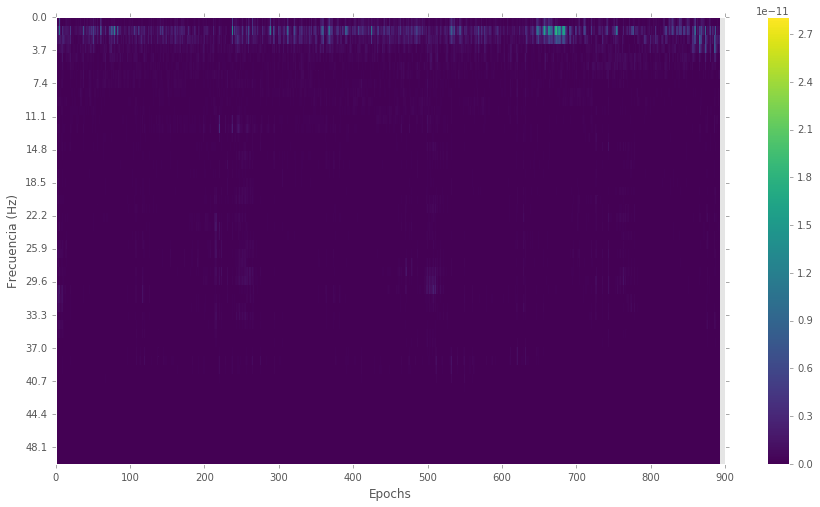

In [147]:
# Ejercicio 1.a.1)

potencias = []
maxEpochs = 0
for data in dfs :
    df_concat = pd.DataFrame([])
    for x in (8,44,80,131,185):
        df = data.loc[x]
        df_concat = pd.concat((df_concat, df))
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    heatmapData = []
    for e in range(0, dataEpochs(data)):
        f, Pxx_den = sps.welch(df_means.loc[e], fs=250, nperseg=201)
        heatmapData.append(Pxx_den)
    heatmapData = np.asarray(heatmapData)
    heatmapData = np.transpose(heatmapData)
    if dataEpochs(data) > maxEpochs :
        maxEpochs = dataEpochs(data)
    maxFrecuencia = f.shape[0]
    potencias.append(heatmapData)

meanHeatmapData = np.empty([maxFrecuencia, maxEpochs])
for f in range(0, maxFrecuencia, 1) :
    for e in range (0, maxEpochs, 1) :
        p = 0
        c = 0
        for heatmapData in potencias :
            if heatmapData.shape[1] > e :
                p += heatmapData[f][e]
                c = c + 1
        meanHeatmapData[f][e] = p / c

X = np.arange(0, maxEpochs, 1)
Y = np.arange(0, maxFrecuencia, 1)
X, Y = np.meshgrid(X, Y)

plt.figure(figsize=(15, 8))
plt.ylim([0,50])
plt.yticks(np.arange(0, 50, 3.7))
plt.pcolormesh(X, Y, meanHeatmapData, cmap='viridis')
plt.colorbar()
plt.xlabel('Epochs')
plt.ylabel('Frecuencia (Hz)')
plt.gca().invert_yaxis()
plt.show()

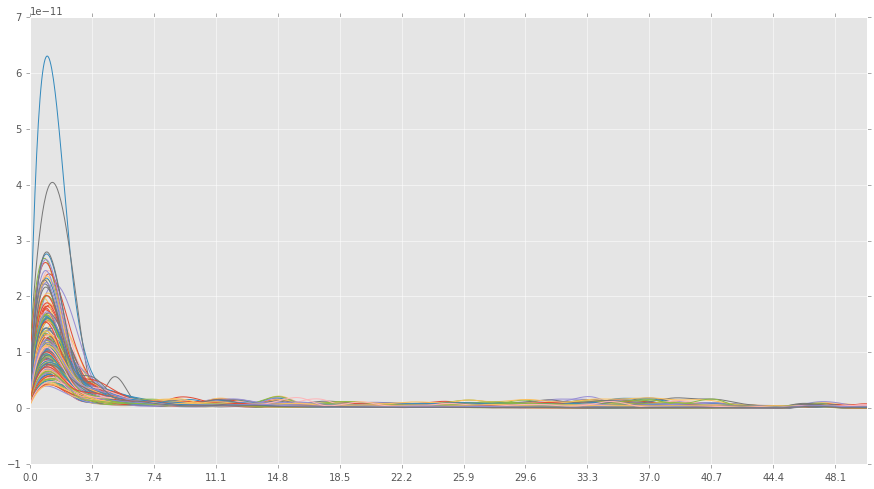

In [158]:
# Ejercicio 1.a.2)

from scipy.interpolate import interp1d

plt.figure(figsize=(15, 10))
plt.xlim([0,50])
plt.xticks(np.arange(0, 50, 3.7))

for e in range(0, electrodos):
    meanDensities = []
    for data in dfs :
        densities = []
        for i in range(0, dataEpochs(data)):
            f, Pxx_den = sps.welch(data.loc[e,i], fs=250)
            densities.append(Pxx_den)
        f = np.asarray(f)
        densities = np.asarray(densities)
        meanDensities.append(densities.mean(axis=0))
    meanDensities = np.asarray(meanDensities).mean(axis=0)
    func = interp1d(f, meanDensities, kind='cubic')
    fnew = np.linspace(0, 50, num=1000, endpoint=True)
    plt.plot(fnew, func(fnew))

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.show()

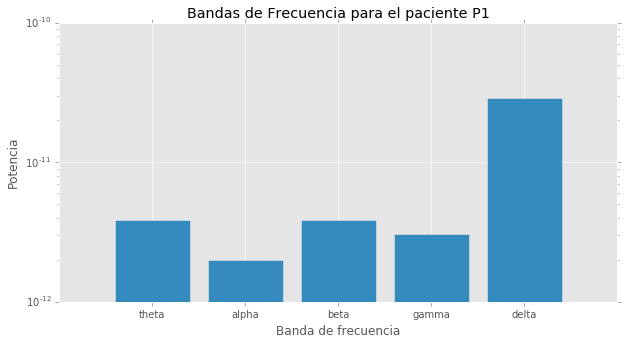

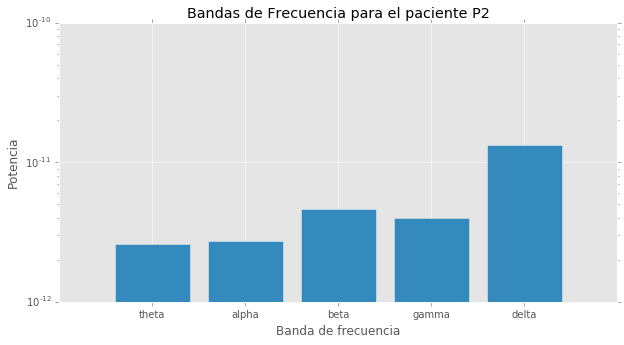

In [163]:
# Ejercicio 1.b)

def get_espectro(frecuencia, potencia):
    delta, theta, alpha, beta, gamma = 0, 0, 0, 0, 0
    i = 0
    while i < len(frecuencia) : 
        if frecuencia[i] < 4 : 
            delta += potencia[i]
        else : 
            if frecuencia[i] >= 4 and frecuencia[i] < 8 :
                theta += potencia[i]
            else : 
                if frecuencia[i] >= 8 and frecuencia[i] < 13 :
                    alpha += potencia[i]
                else : 
                    if frecuencia[i] >= 13 and frecuencia[i] < 30 :
                        beta += potencia[i]
                    else : 
                        gamma += potencia[i]
        i = i + 1
    return delta , theta , alpha , beta , gamma

def calcularBandasDeFrecuencia(data, paciente):
    deltaProm , thetaProm , alphaProm , betaProm , gammaProm = [], [], [], [], []
    bandas = []
    for e in range(0, electrodos):
        for i in range(0, epochs):
            f, Pxx_den = sps.welch(data.loc[e,i], fs=250)
            delta , theta , alpha , beta , gamma = get_espectro(f , Pxx_den)
            bandas.append(np.asarray([delta, theta, alpha, beta, gamma]))
    bandas = np.asarray(bandas).mean(axis=0)
    D = {'delta': bandas[0], 'theta': bandas[1], 'alpha': bandas[2], 'beta': bandas[3], 'gamma': bandas[4] }
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(D)), D.values(), align='center')
    plt.xticks(range(len(D)), D.keys())
    plt.yscale('log')
    plt.title('Bandas de Frecuencia para el paciente ' + paciente)
    plt.xlabel('Banda de frecuencia')
    plt.ylabel('Potencia')
    plt.show()
    return bandas

n = 1
bandasFrecuencia = []
for data in dfs :
    if n < 11 :
        paciente = 'P' + str(n)
    else :
        paciente = 'S' + str(n-10)
    potencias = calcularBandasDeFrecuencia(data, paciente)
    bandasFrecuencia.append(potencias)
    n = n + 1

bandasFrecuencia = np.asarray(bandasFrecuencia)

In [ ]:
# Otras maneras de calcular las bandas de frecuencia (distintas maneras de tomar los promedios)

# Calculando un solo welch promediando todos los epoch de un sujeto
def calcularBandasDeFrecuencia1(a):
    promedio = a.mean()
    frecuencia , potencia = sps.welch(promedio, fs = 250)
    delta , theta , alpha , beta , gamma = get_espectro(frecuencia , potencia)
    D = {'delta': delta, 'theta': theta, 'alpha': alpha, 'beta': beta, 'gamma': gamma }
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(D)), D.values(), align='center')
    plt.xticks(range(len(D)), D.keys())
    plt.yscale('log')
    plt.show()

# Calculo un welch por electrodo tomando el promedio de todos los epochs, y luego promedio las potencias
def calcularBandasDeFrecuencia2(a):
    densities = []
    for e in range(0, electrodos):
        f, Pxx_den = sps.welch(a.loc[e].mean(), fs=250)
        densities.append(Pxx_den)
    f = np.asarray(f)
    densities = np.asarray(densities)
    densities = densities.mean(axis=0)
    frecuencia , potencia = f, densities
    delta , theta , alpha , beta , gamma = get_espectro(frecuencia , potencia)
    D = {'delta': delta, 'theta': theta, 'alpha': alpha, 'beta': beta, 'gamma': gamma }
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(D)), D.values(), align='center')
    plt.xticks(range(len(D)), D.keys())
    plt.yscale('log')
    plt.show()

# Calculo un welch por electrodo y epoch y tomo el promedio de las potencias
def calcularBandasDeFrecuencia3(a):
    densities = []
    for e in range(0, electrodos):
        for i in range(0, epochs):
            f, Pxx_den = sps.welch(a.loc[e,i], fs=250)
            densities.append(Pxx_den)
    f = np.asarray(f)
    densities = np.asarray(densities)
    densities = densities.mean(axis=0)
    frecuencia , potencia = f, densities
    delta , theta , alpha , beta , gamma = get_espectro(frecuencia , potencia)
    D = {'delta': delta, 'theta': theta, 'alpha': alpha, 'beta': beta, 'gamma': gamma }
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(D)), D.values(), align='center')
    plt.xticks(range(len(D)), D.keys())
    plt.yscale('log')
    plt.show()

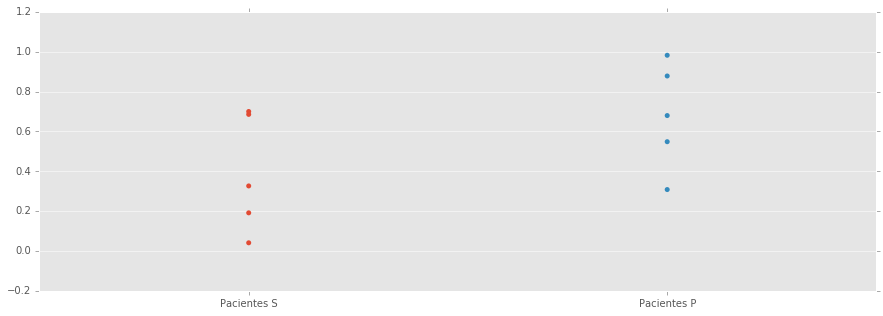

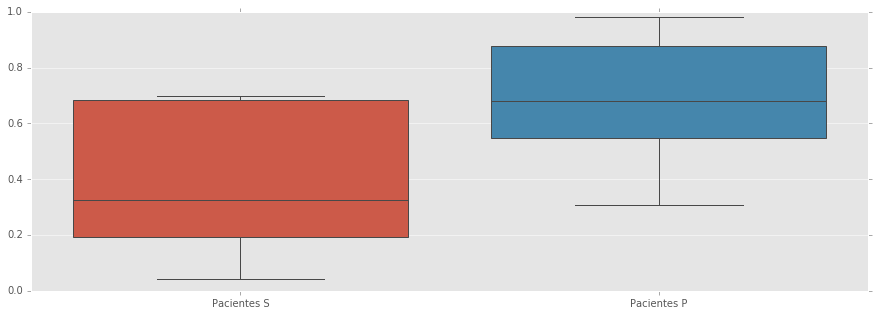

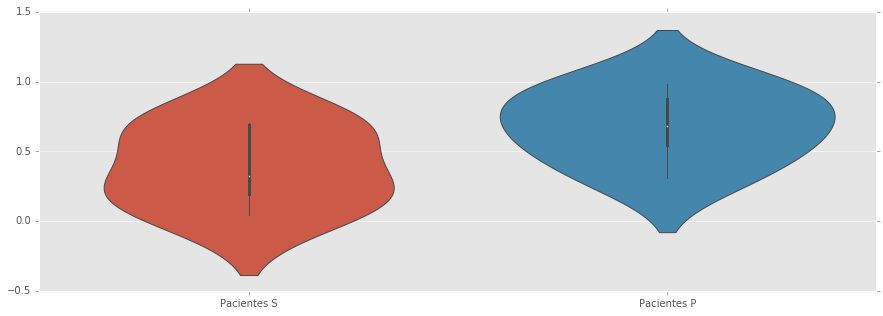

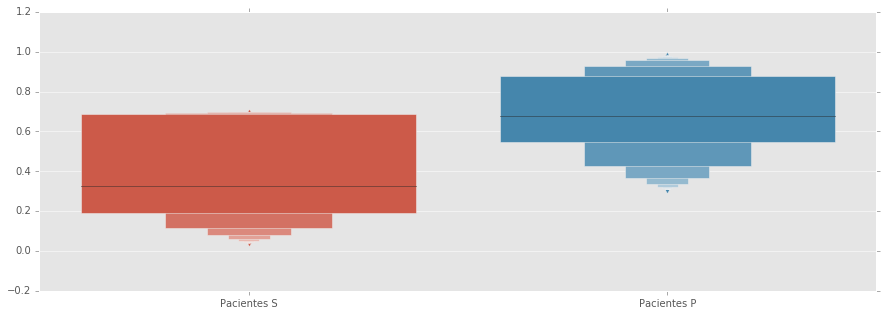

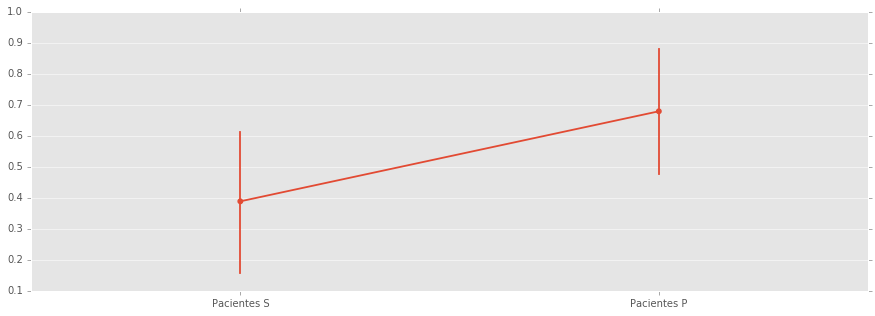

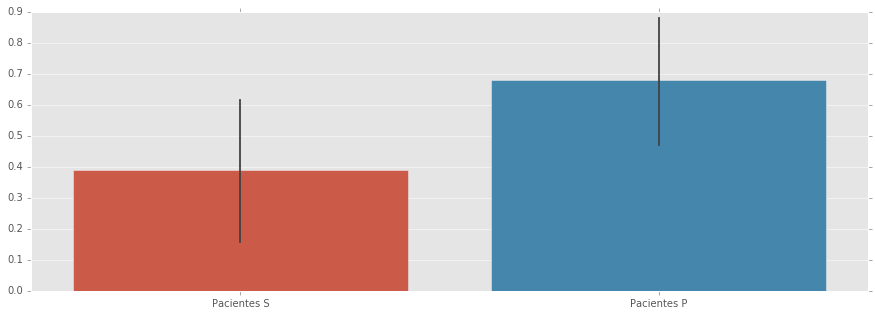

In [225]:
# Ejercicio 1.c)

def compararBanda(dataset):
    plt.figure(figsize=(15, 5))
    sns.stripplot(data=dataset)
    plt.show()

    plt.figure(figsize=(15, 5))
    sns.boxplot(data=dataset)
    plt.show()

    plt.figure(figsize=(15, 5))
    sns.violinplot(data=dataset)
    plt.show()

    plt.figure(figsize=(15, 5))
    sns.lvplot(data=dataset)
    plt.show()

    plt.figure(figsize=(15, 5))
    sns.pointplot(data=dataset)
    plt.show()

    plt.figure(figsize=(15, 5))
    sns.barplot(data=dataset)
    plt.show()

#     tira un error:
#     plt.figure(figsize=(15, 5))
#     sns.countplot(data=dataset)
#     plt.show()

# alphas['Pacientes P'] = bandasFrecuencia[0:5,2]
# alphas['Pacientes S'] = bandasFrecuencia[5:10,2]

alphas = pd.DataFrame([])
alphas['Pacientes S'] = np.random.rand(5)
alphas['Pacientes P'] = np.random.rand(5)

# Normales = S
# Disminuidas = P

compararBanda(alphas)

In [ ]:
# Ejercicio 1.d)
# elegir un grafico y comparar el resto de las bandas. Hcaer un test estadistico apropiado


In [16]:
# Ejercicio 1.e)
# aplicar normalizacion y repetir b) y d)

def normalizar(lista):
  normalizados = []
  for l in lista : 
    mean = l.mean(axis=1)
    std = l.std(axis=1)
    l_normalized = (l.subtract(mean, axis=0).divide(std, axis=0))
    normalizados.append(l_normalized)
  return normalizados